In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Membaca dataset
dataset = pd.read_csv('Dataset_KNN_Pelanggan.csv')

In [24]:
# Mengambil fitur dan label
X = dataset.iloc[:, [0, 3]].values  # Umur dan Skor Belanja
y = dataset.iloc[:, -1].values     # Kelas

In [25]:
# Encode label menjadi angka
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Loyal = 1, Tidak Loyal = 0

In [26]:
print(X)

[[58 36]
 [33 14]
 [61 12]
 [55 12]
 [31  4]
 [53 90]
 [52 76]
 [35 98]
 [28 36]
 [27 44]
 [24 46]
 [40 94]
 [47 11]
 [53 80]
 [41  9]
 [20 38]
 [23 49]
 [35 21]
 [41 35]
 [62 10]
 [56 94]
 [33 35]
 [58 88]
 [38  8]
 [32 52]
 [35 92]
 [38 51]
 [59 18]
 [33 34]
 [65 52]
 [41 66]
 [49 15]
 [27 55]
 [56 77]
 [47  2]
 [61 69]
 [35 15]
 [36  1]
 [64 65]
 [29 81]
 [37 78]
 [30 21]
 [52  1]
 [56 15]
 [41 31]
 [21 11]
 [23 98]
 [52 85]
 [48 34]
 [51 28]
 [52 26]
 [63 84]
 [41 58]
 [25 44]
 [19 76]
 [32 81]
 [21 43]
 [22 86]
 [49 93]
 [54 61]
 [44 85]
 [45 60]
 [64 83]
 [24 44]
 [24 69]
 [46 36]
 [47 57]
 [53 70]
 [18 31]
 [28 28]
 [43 49]
 [18 59]
 [36 72]
 [60 25]
 [36 75]
 [65 41]
 [21 65]
 [51 11]
 [29 87]
 [33 32]
 [55 11]
 [44 67]
 [38 86]
 [63 51]
 [26 59]
 [38  2]
 [47 13]
 [22 34]
 [26 32]
 [41 70]
 [63 68]
 [18 39]
 [60 34]
 [25 71]
 [27 27]
 [63 82]
 [34  7]
 [23  6]
 [18 82]
 [34 71]]


In [27]:
print(y)

[1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0]


In [28]:
len(X)

100

In [29]:
len(y)

100

In [30]:
# Membagi data menjadi latih dan uji
from sklearn.model_selection import train_test_split
X_latih, X_test, y_latih, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
print(X_latih)

[[48 34]
 [52 76]
 [34 71]
 [38 86]
 [21 65]
 [44 85]
 [55 11]
 [63 68]
 [18 31]
 [63 84]
 [59 18]
 [41 35]
 [21 43]
 [24 44]
 [36 75]
 [33 14]
 [45 60]
 [52  1]
 [30 21]
 [31  4]
 [20 38]
 [35 21]
 [37 78]
 [64 65]
 [53 90]
 [18 39]
 [54 61]
 [58 36]
 [47  2]
 [33 34]
 [52 26]
 [40 94]
 [61 69]
 [38  8]
 [41 58]
 [24 46]
 [49 15]
 [47 57]
 [22 86]
 [33 32]
 [38  2]
 [27 55]
 [26 59]
 [41  9]
 [41 70]
 [62 10]
 [65 52]
 [51 28]
 [23  6]
 [18 82]
 [28 28]
 [56 94]
 [27 27]
 [36 72]
 [51 11]
 [35 92]
 [36  1]
 [44 67]
 [23 98]
 [29 81]
 [46 36]
 [49 93]
 [47 11]
 [26 32]
 [43 49]
 [22 34]
 [35 15]
 [33 35]
 [63 51]
 [27 44]
 [34  7]
 [53 70]
 [24 69]
 [52 85]
 [41 31]]


In [34]:
len(X_latih)

75

In [35]:
len(X_test)

25

In [37]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_latih = sc.fit_transform(X_latih)
X_test = sc.transform(X_test)

In [38]:
print(X_latih)

[[ 0.62102502 -0.43622674]
 [ 0.92445744  1.03027723]
 [-0.44098845  0.85569343]
 [-0.13755603  1.37944484]
 [-1.42714382  0.64619286]
 [ 0.3175926   1.34452808]
 [ 1.15203176 -1.23931224]
 [ 1.7588966   0.75094314]
 [-1.65471814 -0.54097702]
 [ 1.7588966   1.30961132]
 [ 1.45546418 -0.99489491]
 [ 0.09001829 -0.40130997]
 [-1.42714382 -0.12197589]
 [-1.19956951 -0.08705912]
 [-0.28927224  0.99536047]
 [-0.51684656 -1.13456196]
 [ 0.39345071  0.47160905]
 [ 0.92445744 -1.58847985]
 [-0.74442087 -0.89014463]
 [-0.66856277 -1.48372957]
 [-1.50300193 -0.29655969]
 [-0.36513035 -0.89014463]
 [-0.21341414  1.10011075]
 [ 1.83475471  0.64619286]
 [ 1.00031555  1.51911189]
 [-1.65471814 -0.26164293]
 [ 1.07617366  0.50652581]
 [ 1.37960608 -0.36639321]
 [ 0.54516692 -1.55356309]
 [-0.51684656 -0.43622674]
 [ 0.92445744 -0.71556082]
 [ 0.01416018  1.65877893]
 [ 1.60718039  0.7858599 ]
 [-0.13755603 -1.34406253]
 [ 0.09001829  0.40177553]
 [-1.19956951 -0.0172256 ]
 [ 0.69688313 -1.0996452 ]
 

In [39]:
print(X_test)

[[-0.13755603  0.1573582 ]
 [ 0.54516692 -1.16947872]
 [ 1.60718039 -1.20439548]
 [-0.59270466  1.20486104]
 [ 1.91061281 -0.19180941]
 [-1.1237114   0.85569343]
 [-1.27542761  0.08752468]
 [ 1.53132229 -0.75047759]
 [-1.57886003  1.03027723]
 [ 1.7588966   1.2397778 ]
 [-1.1237114  -0.08705912]
 [ 1.53132229 -0.43622674]
 [-0.82027898  1.4143616 ]
 [ 1.00031555  1.16994428]
 [-0.36513035  1.79844598]
 [ 0.09001829  0.68110962]
 [ 1.37960608  1.44927837]
 [-0.59270466  0.19227496]
 [ 1.22788987  1.06519399]
 [-0.89613709 -0.36639321]
 [ 1.22788987 -1.0996452 ]
 [ 1.83475471  1.27469456]
 [ 1.15203176 -1.20439548]
 [-1.65471814  0.43669229]
 [-1.42714382 -1.23931224]]


In [40]:
# Membuat model K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_latih, y_latih)

KNeighborsClassifier()

In [41]:
# Prediksi data uji
y_prediksi = classifier.predict(X_test)

In [42]:
# Evaluasi model
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_prediksi))
print("Akurasi:", accuracy_score(y_test, y_prediksi))
print("Tingkat Akurasi:", accuracy_score(y_test, y_prediksi) * 100, "%")

Confusion Matrix:
 [[ 2  3]
 [ 1 19]]
Akurasi: 0.84
Tingkat Akurasi: 84.0 %


<ipython-input-43-91932e0a34e8>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_data[y_data == j, 0], X_data[y_data == j, 1],
<ipython-input-43-91932e0a34e8>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_data[y_data == j, 0], X_data[y_data == j, 1],


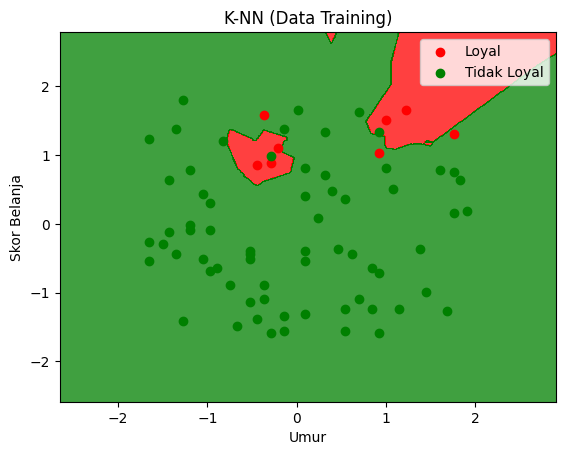

In [43]:
from matplotlib.colors import ListedColormap
X_data, y_data = X_latih, y_latih
X_one, X_two = np.meshgrid(
    np.arange(start = X_data[:, 0].min() - 1, stop = X_data[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_data[:, 1].min() - 1, stop = X_data[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X_one, X_two, classifier.predict(np.array([X_one.ravel(), X_two.ravel()]).T).reshape(X_one.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X_one.min(), X_one.max())
plt.ylim(X_two.min(), X_two.max())

for i, j in enumerate(np.unique(y_data)):
    plt.scatter(X_data[y_data == j, 0], X_data[y_data == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = le.inverse_transform([j])[0])

plt.title('K-NN (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja')
plt.legend()
plt.show()


<ipython-input-44-a7858d51ece0>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_data[y_data == j, 0], X_data[y_data == j, 1],
<ipython-input-44-a7858d51ece0>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_data[y_data == j, 0], X_data[y_data == j, 1],


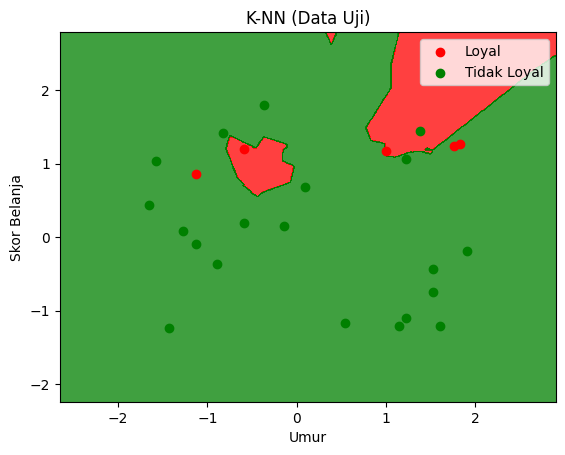

In [44]:
from matplotlib.colors import ListedColormap
X_data, y_data = X_test, y_test
X_one, X_two = np.meshgrid(
    np.arange(start = X_data[:, 0].min() - 1, stop = X_data[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_data[:, 1].min() - 1, stop = X_data[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X_one, X_two, classifier.predict(np.array([X_one.ravel(), X_two.ravel()]).T).reshape(X_one.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X_one.min(), X_one.max())
plt.ylim(X_two.min(), X_two.max())

for i, j in enumerate(np.unique(y_data)):
    plt.scatter(X_data[y_data == j, 0], X_data[y_data == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = le.inverse_transform([j])[0])

plt.title('K-NN (Data Uji)')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja')
plt.legend()
plt.show()
